In [1]:
# Library Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow.keras.regularizers as Regularizers

In [2]:
diabetes_data = pd.read_csv("C:/Users/Dell/Documents/sem-1/ML/diabetes.csv")

In [3]:
print("Printing the Diabetes dataset:\n",diabetes_data)

Printing the Diabetes dataset:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [4]:
print('Shape of the Dataset:\n', diabetes_data.shape)

Shape of the Dataset:
 (768, 9)


In [5]:
print('First 10 rows of the dataframe:\n\n', diabetes_data.head(10))

First 10 rows of the dataframe:

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1

In [6]:
print('Dataset Description:\n\n', diabetes_data.describe())

Dataset Description:

        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0

In [7]:
# Correlation Matrix for the Data 
corr_matrix = diabetes_data.corr()
print('Data Correlation Matrix:\n', corr_matrix)

Data Correlation Matrix:
                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose        

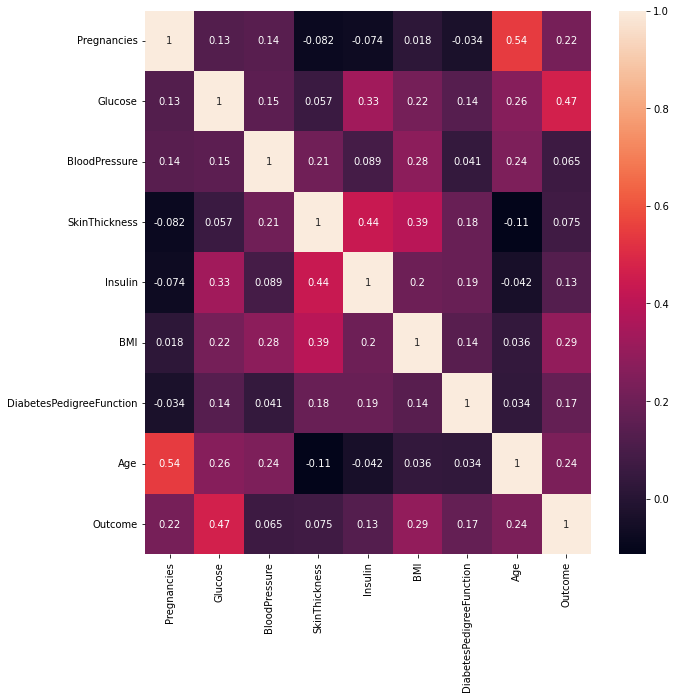

In [8]:
#plotting the Correlation Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

In [9]:
# Check NA values
diabetes_data.isnull().values.any()

False

In [10]:
# Checking number of 0 values for all features
(diabetes_data == 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [11]:
# Replacing 0 values with the mean of respective feature
for col in diabetes_data.columns[:-1]:
    val = diabetes_data[col].mean()
    diabetes_data[col] = diabetes_data[col].replace(0, val)

In [12]:
# Converting into a numpy Matrix to feed into the model
features = np.asmatrix(diabetes_data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
Target = np.asmatrix(diabetes_data['Outcome']).T

# Standardization
features = (features-np.mean(features,axis=0))/np.std(features,axis=0)

In [13]:
print("Shape of feature matrix",features.shape)
print("Shape of Target matrix",Target.shape)

Shape of feature matrix (768, 8)
Shape of Target matrix (768, 1)


In [14]:
# Splitting the dataset into train and test datasets. 60% of the dataset is used for training and 40% is used for validation and testing. 
train_x, temp_x, train_y, temp_y = train_test_split(features,Target, train_size=0.6)

In [15]:
# Splitting into validation and testing sets
val_x, test_x, val_y, test_y = train_test_split(temp_x,temp_y, test_size=0.5)

In [16]:
print('Total number of data items:', len(diabetes_data))
print('\nNumber of data points in the training dataset:', len(train_x))
print('\nNumber of data points in the validation dataset:', len(val_x))
print('\nNumber of data points in the test dataset:', len(test_x))
print('\nShape of the training dataset:', train_x.shape)
print('\nShape of the validation dataset:', val_x.shape)
print('\nShape of the test dataset:', test_x.shape)
print('\n Training dataset type:', type(train_x))
print('\n Validation dataset type:', type(val_x))
print('\n Test dataset type:', type(test_x))

Total number of data items: 768

Number of data points in the training dataset: 460

Number of data points in the validation dataset: 154

Number of data points in the test dataset: 154

Shape of the training dataset: (460, 8)

Shape of the validation dataset: (154, 8)

Shape of the test dataset: (154, 8)

 Training dataset type: <class 'numpy.matrix'>

 Validation dataset type: <class 'numpy.matrix'>

 Test dataset type: <class 'numpy.matrix'>


In [17]:
# Initializing the weights 
weights = np.asmatrix([0,0,0,0,0,0,0,0]).T
# intiatilizing the no of iterations(epochs)
epochs = 100000
# learning rate(alpha)
alpha = 1e-3
# bias
b=0
# Number of training samples
m=train_x.shape[0]
losstrack = []

In [18]:
print("Shape of Target matrix",weights.shape)

Shape of Target matrix (8, 1)


In [19]:
for i in range(epochs):
  z = np.dot(train_x,weights)+b
  y_pred = 1/(1+np.exp(-z))
  dz=y_pred-train_y
  gradient = np.dot(train_x.transpose(), dz)
  db = (1 / m) * np.sum(dz)
  weights = weights - alpha * gradient/m
  b = b - alpha * db
  cost = -np.sum(np.multiply(np.log(y_pred), train_y) + np.multiply((1 - train_y), np.log(1 - y_pred)))/m
  losstrack.append(np.squeeze(cost))

In [20]:
weights

matrix([[ 0.37738732],
        [ 1.19504275],
        [-0.15762677],
        [ 0.02331175],
        [-0.24102857],
        [ 0.56765673],
        [ 0.32425822],
        [ 0.21094684]])

In [21]:
# Getting the predictions and calculating the accuracy on the validation data.
pred_z = np.dot(val_x,weights)+b
predictions = 1/(1+np.exp(-pred_z))

final_predictions = []
final_predictions = [1 if prediction > 0.5 else 0 for prediction in predictions]

acc_counts=0
for i in range(val_y.shape[0]):
    if final_predictions[i] == val_y[i]:
        acc_counts += 1
accuracy = acc_counts / (val_y.shape[0]) * 100
print('Accuracy:', accuracy)

Accuracy: 70.12987012987013


In [22]:
# Getting the predictions and calculating the accuracy on the test data.
pred_z = np.dot(test_x,weights)+b
predictions = 1/(1+np.exp(-pred_z))

final_predictions = []
final_predictions = [1 if prediction > 0.5 else 0 for prediction in predictions]

acc_counts=0
for i in range(test_y.shape[0]):
    if final_predictions[i] == test_y[i]:
        acc_counts += 1
accuracy = acc_counts / (test_y.shape[0]) * 100
print('Accuracy:', accuracy)

Accuracy: 79.87012987012987


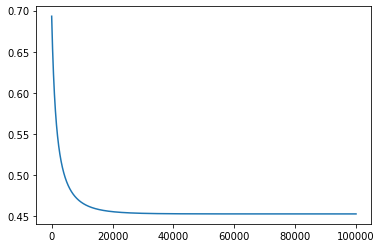

In [23]:
plt.plot(losstrack)

In [43]:
# Neural Network
# Model creation
model = Sequential()
#sgd = SGD(learning_rate=0.01)
adam = Adam(learning_rate=0.001) # optimizer
model.add(Dropout(0.5, noise_shape=None, seed=None)) #Dropout Regularization
model.add(Dense(32, kernel_initializer='uniform', activation='relu', input_dim=8))  # Hidden layer.
#L1 Regularization
#model.add(Dense(32, kernel_initializer='uniform', kernel_regularizer=Regularizers.l1(), activation='relu', input_dim=8))  # Hidden layer.
#L2 Regularization
#model.add(Dense(32, kernel_initializer='uniform', kernel_regularizer=Regularizers.l2(0.01), activation='relu', input_dim=8))  # Hidden layer.
model.add(Dense(8, kernel_initializer='uniform', activation='relu')) # Hidden layer.
model.add(Dense(1, activation='sigmoid'))  # Output layer.(Since there is 1 target)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
#print(model.summary())

# Training the model.
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y), epochs=100, batch_size=64)

# Evaluating the model
loss, accuracy = model.evaluate(test_x, test_y)
print('\n\n Loss', loss, 'Accuracy:', accuracy)

Epoch 1/100
8/8 [==============================] - 1s 36ms/step - loss: 0.6893 - accuracy: 0.6761 - val_loss: 0.6875 - val_accuracy: 0.6429
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6810 - accuracy: 0.6783 - val_loss: 0.6794 - val_accuracy: 0.6429
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6700 - accuracy: 0.6783 - val_loss: 0.6683 - val_accuracy: 0.6429
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6557 - accuracy: 0.6783 - val_loss: 0.6531 - val_accuracy: 0.6429
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6387 - accuracy: 0.6783 - val_loss: 0.6342 - val_accuracy: 0.6429
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6150 - accuracy: 0.6783 - val_loss: 0.6123 - val_accuracy: 0.6429
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5928 - accuracy: 0.6783 - val_loss: 0.5880 - val_accuracy: 0.6429
Epoch 8/100
8/8 [=========

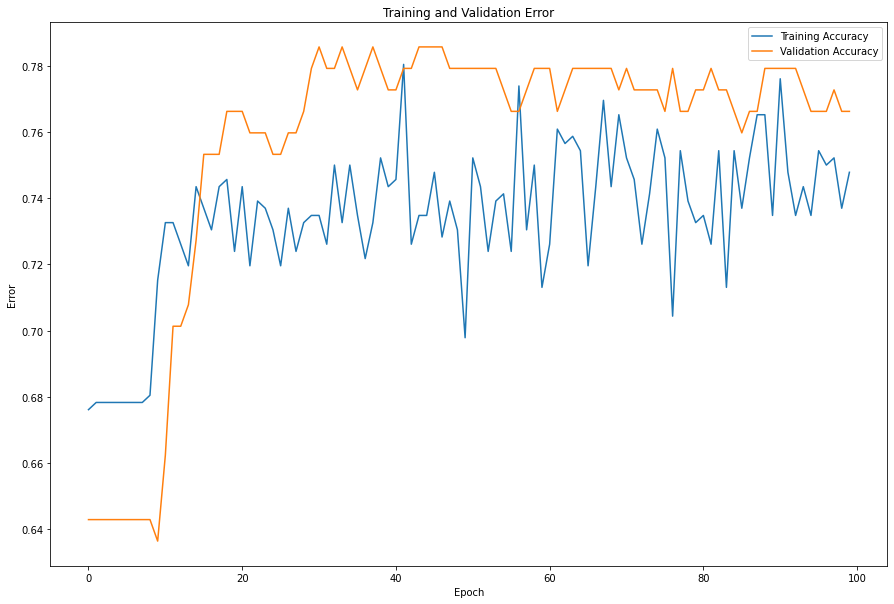

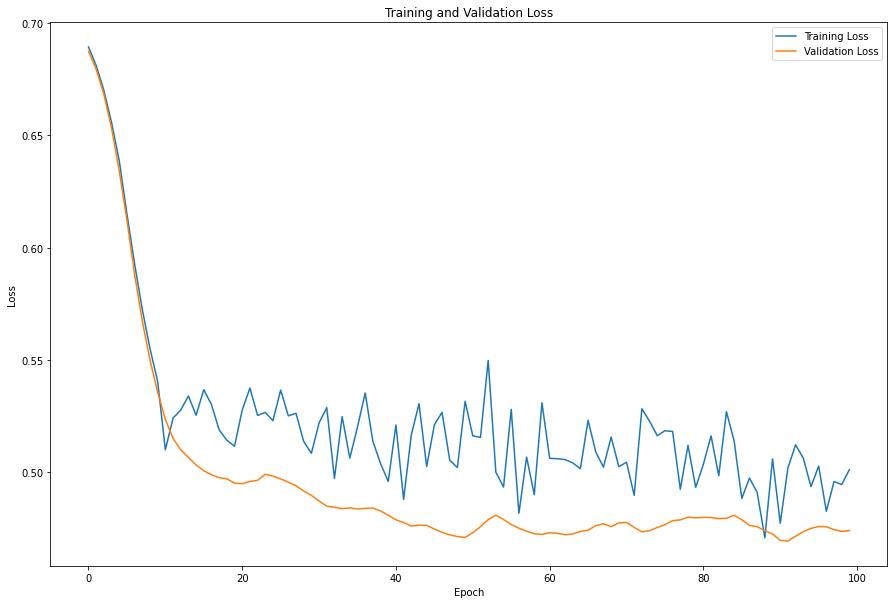

In [44]:
# Plot the accuracy and loss.

# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

# Loss
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()